The deal down shuffle is a methematical way to shuffle a packet of card.
The steps to perform this is:
1. place top card down in a separate pile
2. place next card on the bottom of the dealing packet
3. place the next card on top of the separate pile
4. repeat until no cards are left in the hand.


Written as a list, the stack is held from top to bottom: [top,...,bottom]

In [279]:
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools as it

In [280]:
def T(x):
  '''
  Function to perform the shuffle
  [1,2,3,4] -> [4,2,3,1]
  [1,2,3,4,5] -> [2,4,5,3,1]
  [1,2,3,4,5,6] -> [4,6,2,5,3,1]
  limited to about 1000 recursions, x > 1000
  '''

  assert x != [], 'Bad array, empty list'
  if type(x) == int:
    x = list(range(1, x+1))

  if len(x) == 1:
    return x
  else:
    y = [x.pop(0)] #place onto new pile
    x.append(x.pop(0)) #place next to the bottom
    return T(x) + y #recurse operations

def T2(x):
  """
  alternative to recursive option
  """
  assert x != [], 'Bad array, empty list'
  if type(x) == int:
    x = list(range(1, x+1))

  new = []
  while len(x) > 0:
    new.append(x.pop(0))
    if len(x) == 0:
      break
    x.append(x.pop(0))
  return new[::-1] #reverse final list
  

In [281]:
for i in range(1,20):
  print(i,T2(i))

1 [1]
2 [2, 1]
3 [2, 3, 1]
4 [4, 2, 3, 1]
5 [2, 4, 5, 3, 1]
6 [4, 6, 2, 5, 3, 1]
7 [6, 2, 4, 7, 5, 3, 1]
8 [8, 4, 6, 2, 7, 5, 3, 1]
9 [2, 6, 8, 4, 9, 7, 5, 3, 1]
10 [4, 8, 10, 6, 2, 9, 7, 5, 3, 1]
11 [6, 10, 2, 8, 4, 11, 9, 7, 5, 3, 1]
12 [8, 12, 4, 10, 6, 2, 11, 9, 7, 5, 3, 1]
13 [10, 2, 6, 12, 8, 4, 13, 11, 9, 7, 5, 3, 1]
14 [12, 4, 8, 14, 10, 6, 2, 13, 11, 9, 7, 5, 3, 1]
15 [14, 6, 10, 2, 12, 8, 4, 15, 13, 11, 9, 7, 5, 3, 1]
16 [16, 8, 12, 4, 14, 10, 6, 2, 15, 13, 11, 9, 7, 5, 3, 1]
17 [2, 10, 14, 6, 16, 12, 8, 4, 17, 15, 13, 11, 9, 7, 5, 3, 1]
18 [4, 12, 16, 8, 18, 14, 10, 6, 2, 17, 15, 13, 11, 9, 7, 5, 3, 1]
19 [6, 14, 18, 10, 2, 16, 12, 8, 4, 19, 17, 15, 13, 11, 9, 7, 5, 3, 1]


#Finding which old position ends on top

The starting problem is to find a formula to identify what position will go to the first position.


Let f be the function that performs the deal down shuffle.  
n = number of cards that can be represented as  
n = $2^m + l$ where $0<l<2^m$  
then $f(n) = 2l = 2(n-2^m)$
  
f(n) = the old position that ends in position 1

This operation can be represented as manipulating a binary string  

Drop the first binary digit as append a 0 to the end, which encapulates $2(n-2^m)$

In [282]:
def baseb(n, b=2, length=None):
  '''
  Turns decimal into an arbitrary base
  n = decimal integer
  '''
  if length is None:
    length = math.floor(1+math.log(n,b))
  elif n == 0:
    return '0'*length
  

  new_base = ''
  while n!=0:
    r = n%b
    n=n//b
    
    new_base = str(r) + new_base
  lngth = len(new_base)
  if lngth < length:
    new_base = (length-lngth)*'0' + new_base
  return new_base

def deci(n, base=2):
  '''
  Turns arbritrary base into decimal
  n = base integer string
  '''
  sum = 0
  length = len(n)
  for i in range(length):
    sum += int(n[length-i-1])*base**i
  return sum

def binary_method(old_pos, k=1):
  '''
  old_pos = int old position
  returns int new position
  '''
  base_str = baseb(old_pos)
  new_base_str = base_str[1:] + "0"
  if deci(new_base_str) == 0:
    return old_pos
  else:
    return deci(new_base_str)





for i in range(1,10):
  print(binary_method(i), T(i)[0], T(i))


1 1 [1]
2 2 [2, 1]
2 2 [2, 3, 1]
4 4 [4, 2, 3, 1]
2 2 [2, 4, 5, 3, 1]
4 4 [4, 6, 2, 5, 3, 1]
6 6 [6, 2, 4, 7, 5, 3, 1]
8 8 [8, 4, 6, 2, 7, 5, 3, 1]
2 2 [2, 6, 8, 4, 9, 7, 5, 3, 1]


YAY it works.  
If I didnt have the binary method, I would have the find the biggest $2^m < n$ by finding $m$ first, but since I can just cut it off in its binary form, I dont have to do that

In [283]:
#This is the function I woul dhave to use to find m, here I use "a" to represent the exponent
#I dont use this method
def loop_method(n, k=1):
  #n = number of cards
  #k = position
  a = 0
  while n > 2**a:
    if n>2**a:
      a+=1
  return a


#Finding which old position will go to the determined kth position after a shuffle
Now that a formula to find the first position has been found, it is time to generalize to find a formula for an arbitrary position.

The new position will be already determined, I am just looking for the old position that will end up on the kth position  

In other words, I want to find the inverse function of T, $T^{-1}$(kth position) = old position  

kth position = new position

In [284]:
def N(n, k):
  '''
  n = number of cards starting
  k = new position
  returns old position
  '''
  a = math.ceil(math.log(n/(2*k-1), 2)) - 1#math.floor(1+math.log(x,2)) - 1 #number of digit representation - 1
  if k <= n//2: #in former half
    return 2*(n-(2*k-1)*2**a)
  else: #in latter half
    return 2*n - (2*k-1)

#testing out if formula is correct
for x in range(1,10000): 
  true = np.array(T2(x))
  approx = []
  for i in range(1,x+1):
    approx.append(N(x, i))
  same = np.array_equal(true, approx)
  if not same:
    print(x, same)
    break
  else:
    print(x)


Streaming output truncated to the last 5000 lines.
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189

The formula I found is a piecewise function.

$N: \text{new position, num cards} \rightarrow \text{old position}$  
$n = \text{number of cards}$  
$k = \text{new position}, k \in {1,2,...,n}$


$ 
N(x, k) = 
\begin{cases} 
      2(n-(2k-1)2^a) & k \leq floor(n/2) \\
      2n-(2k-1) & k > floor(n/2)
   \end{cases}
$ where $a = argmax_{n > (2k-1)2^m}(m)$


because of the $(2k-1)$ term, it is harder to do binary manipulation  


I have yet to find a proof that N(n,k) works for all n,k, but I tested it up to n = 10000, it works at least for all n,k for n < 10000

In [285]:
def num_to_reset(N, max_iter = 10000):
  #gets number of iterations until reset
  #returns the number of deals needed to reset
  start = list(range(1,N+1))
  looping = list(range(1,N+1))
  iter = 0
  for i in range(max_iter):
    looping = T2(looping)
    iter += 1
    if np.array_equal(looping,start):
      return iter

  return iter

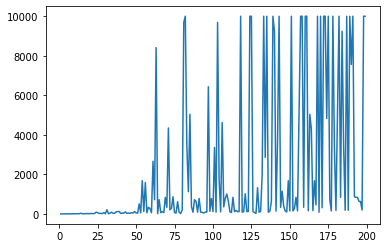

In [286]:
n = 200
reset = []
for i in range(1,n):
  reset.append(num_to_reset(i))
plt.plot(np.arange(1,n),reset)

Conjecture: binary numbers take the least number of shuffles to reset.

In [287]:
n = 32
print(num_to_reset(n),"loops to to reset")

x = list(range(1,n+1))
for i in range(num_to_reset(n)+1):
  print(i,x)
  x = T(x)

12 loops to to reset
0 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
1 [32, 16, 24, 8, 28, 20, 12, 4, 30, 26, 22, 18, 14, 10, 6, 2, 31, 29, 27, 25, 23, 21, 19, 17, 15, 13, 11, 9, 7, 5, 3, 1]
2 [1, 2, 17, 4, 9, 25, 18, 8, 5, 13, 21, 29, 10, 26, 20, 16, 3, 7, 11, 15, 19, 23, 27, 31, 6, 14, 22, 30, 12, 28, 24, 32]
3 [32, 16, 31, 8, 30, 15, 29, 4, 28, 14, 23, 7, 26, 13, 25, 2, 24, 12, 22, 6, 27, 19, 11, 3, 20, 10, 21, 5, 18, 9, 17, 1]
4 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 19, 12, 13, 14, 15, 16, 17, 18, 21, 20, 11, 27, 22, 24, 25, 26, 23, 28, 29, 30, 31, 32]
5 [32, 16, 24, 8, 28, 20, 12, 4, 30, 26, 27, 18, 14, 10, 6, 2, 31, 29, 23, 25, 22, 11, 21, 17, 15, 13, 19, 9, 7, 5, 3, 1]
6 [1, 2, 17, 4, 9, 25, 18, 8, 5, 13, 11, 29, 10, 26, 20, 16, 3, 7, 19, 15, 21, 22, 23, 31, 6, 14, 27, 30, 12, 28, 24, 32]
7 [32, 16, 31, 8, 30, 15, 29, 4, 28, 14, 22, 7, 26, 13, 25, 2, 24, 12, 27, 6, 23, 21, 19, 3, 20, 10, 11, 5, 18, 9, 17, 1]
8 [

finding when the number of cards in a packet == number of iterations to reset

In [288]:
n_cycle = []
ugly_cycle = []
for n in range(1,100+1):
  if n == num_to_reset(n):
    n_cycle.append(n)
  if n < num_to_reset(n):
    ugly_cycle.append(n)
print("n-cycles",n_cycle)
print("ugly cycles",ugly_cycle)

n-cycles [1, 2, 3, 5, 6, 12, 15, 17, 18, 20, 21, 26, 27, 33, 35, 41, 42, 45, 48, 50, 53, 57, 60, 66, 68, 78, 87, 90, 92, 95, 96]
ugly cycles [11, 14, 23, 24, 25, 29, 31, 34, 37, 38, 39, 43, 47, 49, 52, 54, 55, 56, 58, 59, 61, 62, 63, 65, 67, 69, 70, 71, 72, 73, 74, 77, 80, 81, 82, 83, 84, 85, 86, 88, 89, 91, 97, 98, 99, 100]


#Subcycles
As a shuffle cycles through multiple shuffles, there will be subsets that stay only in their own cycle.

I can find subcycles by recording each state as rows, then I can find the cycles by looking at the columns.

A position in a column will only stay in a column

In [289]:
n = 7

def get_subcycles(n):
  # n = length of list
  # m = num of iter to repeat
  m = num_to_reset(n)
  history = np.zeros([m,n],dtype = int) #storing past positions
  a = list(range(1,n+1))
  history[0] = a
  for i in range(1,m): 
    history[i] = T(list(history[i-1]))
  return history
x = get_subcycles(n)
print(x)
print(x.T)


[[1 2 3 4 5 6 7]
 [6 2 4 7 5 3 1]
 [3 2 7 1 5 4 6]
 [4 2 1 6 5 7 3]
 [7 2 6 3 5 1 4]]
[[1 6 3 4 7]
 [2 2 2 2 2]
 [3 4 7 1 6]
 [4 7 1 6 3]
 [5 5 5 5 5]
 [6 3 4 7 1]
 [7 1 6 3 4]]


Now that subcycles have been identified, there is still the case of removing the duplicates

In [290]:
def get_unique_subsets(n):
  #get list of possible subcycles
  #does not preserve order within a subcycle
  y = get_subcycles(n).T
  z=[] #list to put results in
  for i in range(n):
    #sorted sorts each list
    #set removes duplicates inside a subcycle
    #list turns it back into a list
    z.append(list(set(sorted(y[i]))))
    #z has repeated subcycles that need to be removed
  z = remove_unique(z)
  #print(z)
  return z

def remove_unique(x):
  #removes duplicate elements in a list
  new_x = []
  for elem in x:
      if elem not in new_x:
          new_x.append(elem)
  return new_x


In [291]:

for i in range(1,30):
  print(i,get_unique_subsets(i))


1 [[1]]
2 [[1, 2]]
3 [[1, 2, 3]]
4 [[1, 4], [2], [3]]
5 [[1, 2, 3, 4, 5]]
6 [[1, 2, 3, 4, 5, 6]]
7 [[1, 3, 4, 6, 7], [2], [5]]
8 [[8, 1], [2, 4], [3, 5, 6, 7]]
9 [[1, 2, 5, 6, 7, 9], [8, 3], [4]]
10 [[1, 3, 4, 6, 9, 10], [8, 2, 5], [7]]
11 [[1, 11, 6], [10, 2, 3], [4, 5, 7, 8, 9]]
12 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
13 [[1, 10, 13, 7], [2], [3, 4, 12, 6], [8, 11, 5], [9]]
14 [[1, 2, 4, 5, 7, 9, 10, 11, 12, 14], [8, 3, 13], [6]]
15 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
16 [[16, 1], [8, 2], [9, 3, 12, 15], [4], [5, 14], [10, 13, 6, 7], [11]]
17 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]]
18 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]
19 [[1, 4, 6, 7, 9, 10, 12, 15, 16, 19], [2, 5, 11, 14, 17], [18, 3], [8], [13]]
20 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
21 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
22 [[1, 3, 4, 6, 7, 9, 10, 12, 13, 16, 18, 19, 21, 22], 